In [17]:
import pandas as pd                             #import pandas for dataframe manipulation
import numpy as np                              #import numerical python
#import seaborn as sns                           #seaborn for visuals
import matplotlib as mpl                        #matplot for plotting
import matplotlib.pyplot as plt                 #matplot for plotting
import itertools
import datetime as dt                           #convert date formats
from scipy import stats                         #statistical analysis


from IPython.display import display             # Allows the use of display() for DataFrames
import warnings                                 # Suppress warnings 
warnings.filterwarnings('ignore') 
import os                                       # File system manangement
import gc                                       # memory managemen

In [10]:
#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

%matplotlib inline

In [11]:
#Read datasets
traindemographics = pd.read_csv('traindemographics.csv', parse_dates=['birthdate'])
testdemographics = pd.read_csv('testdemographics.csv', parse_dates=['birthdate'])
trainperf = pd.read_csv('trainperf.csv', parse_dates=['approveddate','creationdate'])
testperf = pd.read_csv('testperf.csv',parse_dates=['approveddate','creationdate'])
trainprevloans= pd.read_csv('trainprevloans.csv', parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])
testprevloans = pd.read_csv('testprevloans.csv', parse_dates=['approveddate','creationdate','closeddate',
                                                                          'firstduedate','firstrepaiddate'])

In [12]:
# Check The Shape Of The Data Loaded
print('Test Demographic shape: {} Rows, {} Columns'.format(*trainperf.shape))
print('Test Performance shape: {} Rows, {} Columns'.format(*traindemographics.shape))
print('Test Previous Loan shape: {} Rows, {} Columns'.format(*trainprevloans.shape))
print('Train Demographic shape: {} Rows, {} Columns'.format(*testperf.shape))
print('Train Performance shape: {} Rows, {} Columns'.format(*testdemographics.shape))
print('Train Previous Loan shape: {} Rows, {} Columns'.format(*testprevloans.shape))

Test Demographic shape: 4368 Rows, 10 Columns
Test Performance shape: 4346 Rows, 9 Columns
Test Previous Loan shape: 18183 Rows, 12 Columns
Train Demographic shape: 1450 Rows, 9 Columns
Train Performance shape: 1487 Rows, 9 Columns
Train Previous Loan shape: 5907 Rows, 12 Columns


In [13]:
# Print First Few Rows Of The Data
display("test demographics")
display(testdemographics.head(3))
display("test performance")
display(testperf.head(3))
display("test previous loans")
display(testprevloans.head(3))
display("train demographics")
display(traindemographics.head(3))
display("train performance")
display(trainperf.head(3))
display("train previous loans")
display(trainprevloans.head(3))

'test demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858f305c8dd672015c93b1db645db4,1976-08-28,Savings,5.30,7.59,Heritage Bank,NaN,Permanent,NaN
1,8a858f085a477386015a47fb049e49ca,1978-06-23,Savings,3.29,6.60,UBA,NaN,Permanent,NaN
2,8a858e6f5cd5e874015cd6f5634c39ad,1984-04-04,Savings,8.50,7.73,First Bank,NaN,Permanent,NaN


'test performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,"12,250.00",30,NaN
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,"44,000.00",30,NaN
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,"24,500.00",30,NaN


'test previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,"10,000.00","13,000.00",30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,"30,000.00","36,800.00",60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,"30,000.00","34,400.00",30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46


'train demographics'

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.32,6.53,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.33,7.12,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.75,5.56,Fidelity Bank,NaN,NaN,NaN


'train performance'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,"30,000.00","34,500.00",30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,"15,000.00","17,250.00",30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,"20,000.00","22,250.00",15,NaN,Good


'train previous loans'

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,"10,000.00","13,000.00",30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,"10,000.00","13,000.00",30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,"20,000.00","23,800.00",30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47


In [14]:
display("test demographics")
display(testdemographics.columns)
display("test performance")
display(testperf.columns)
display("test previous loans")
display(testprevloans.columns)
display("train demographics")
display(traindemographics.columns)
display("train performance")
display(trainperf.columns)
display("train previous loans")
display(trainprevloans.columns)

'test demographics'

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

'test performance'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby'],
      dtype='object')

'test previous loans'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

'train demographics'

Index(['customerid', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'bank_branch_clients',
       'employment_status_clients', 'level_of_education_clients'],
      dtype='object')

'train performance'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'good_bad_flag'],
      dtype='object')

'train previous loans'

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'closeddate',
       'referredby', 'firstduedate', 'firstrepaiddate'],
      dtype='object')

In [15]:
# Number of each type of column
display("test demographics")
display(testdemographics.dtypes.value_counts())
display("test performance")
display(testperf.dtypes.value_counts())
display("test previous loans")
display(testprevloans.dtypes.value_counts())
display("train demographics")
display(traindemographics.dtypes.value_counts())
display("train performance")
display(trainperf.dtypes.value_counts())
display("train previous loans")
display(trainprevloans.dtypes.value_counts())

'test demographics'

object            6
float64           2
datetime64[ns]    1
dtype: int64

'test performance'

int64      4
object     4
float64    1
dtype: int64

'test previous loans'

datetime64[ns]    5
int64             3
float64           2
object            2
dtype: int64

'train demographics'

object            6
float64           2
datetime64[ns]    1
dtype: int64

'train performance'

object            3
int64             3
float64           2
datetime64[ns]    2
dtype: int64

'train previous loans'

datetime64[ns]    5
int64             3
float64           2
object            2
dtype: int64

In [25]:
#import pandas_profiling

In [21]:
#profile = pandas_profiling.ProfileReport(testdemographics)
#profile.to_file(outputfile="../reports/html/testdemographics.html")

In [24]:
#profile = pandas_profiling.ProfileReport(testperf)
#profile.to_file(outputfile="../reports/html/testperf.html")

In [26]:
#profile = pandas_profiling.ProfileReport(testprevloans)
#profile.to_file(outputfile="../reports/html/testprevloans.html")

In [27]:
#profile = pandas_profiling.ProfileReport(traindemographics)
#profile.to_file(outputfile="../reports/html/traindemographics.html")

In [28]:
#profile = pandas_profiling.ProfileReport(trainperf)
#profile.to_file(outputfile="../reports/html/trainperf.html")

In [29]:
#profile = pandas_profiling.ProfileReport(trainprevloans)
#profile.to_file(outputfile="../reports/html/trainprevloans.html")

In [30]:
traindemographics['set'] = 'train'
testdemographics['set'] = 'test'
trainperf['set'] = 'train'
testperf['set'] = 'test'
trainprevloans['set'] = 'train'
testprevloans['set'] = 'test'

In [31]:
Tdemographics=pd.concat([traindemographics,testdemographics])
Tperfomance=pd.concat([trainperf,testperf])
Tprevious=pd.concat([trainprevloans,testprevloans])

In [32]:
# Convert the good_bad_flag into numerical binary variable 
goodbad={'Good':1,'Bad':0}
Tperfomance.good_bad_flag=Tperfomance.good_bad_flag.map(goodbad)

In [33]:
Tperfomance.head()

,approveddate,creationdate,customerid,good_bad_flag,loanamount,loannumber,referredby,set,systemloanid,termdays,totaldue
0,2017-07-25 08:22:56,2017-07-25 07:22:47,8a2a81a74ce8c05d014cfb32a0da1049,1.00,"30,000.00",12,NaN,train,301994762,30,"34,500.00"
1,2017-07-05 17:04:41,2017-07-05 16:04:18,8a85886e54beabf90154c0a29ae757c0,1.00,"15,000.00",2,NaN,train,301965204,30,"17,250.00"
2,2017-07-06 14:52:57,2017-07-06 13:52:51,8a8588f35438fe12015444567666018e,1.00,"20,000.00",7,NaN,train,301966580,15,"22,250.00"
3,2017-07-27 19:00:41,2017-07-27 18:00:35,8a85890754145ace015429211b513e16,1.00,"10,000.00",3,NaN,train,301999343,15,"11,500.00"
4,2017-07-03 23:42:45,2017-07-03 22:42:39,8a858970548359cc0154883481981866,1.00,"40,000.00",9,NaN,train,301962360,30,"44,000.00"


NameError: name 'sns' is not defined

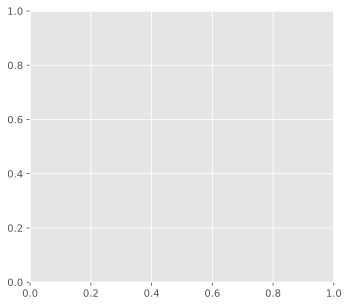

In [34]:
# Distribution of the target variable
fig = plt.figure(figsize=(12, 5))
plt.subplot(121)
Tperfomance[Tperfomance['set'] == "train"]["good_bad_flag"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),
                                                                             startangle = 60,
                                            labels=["repayer","defaulter"],wedgeprops={"linewidth":2,"edgecolor":"k"},
                                            explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = Tperfomance[Tperfomance['set'] == "train"]["good_bad_flag"].value_counts().plot(kind="barh")

for i,j in enumerate(Tperfomance[Tperfomance['set'] == "train"]["good_bad_flag"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")
plt.show()

In [36]:
fig = plt.figure(figsize=(12,4))
miss_train = pd.DataFrame((Tperfomance[Tperfomance['set'] == "train"].isnull().sum())*100/Tperfomance[Tperfomance['set'] == "train"].shape[0]).reset_index()
miss_test  = pd.DataFrame((Tperfomance[Tperfomance['set'] == "test"].isnull().sum())*100/Tperfomance[Tperfomance['set'] == "test"].shape[0]).reset_index()
miss_train["set"] = "train"
miss_test["set"]  =  "test"
missing = pd.concat([miss_train,miss_test],axis=0)
ax = sns.pointplot("index",0,data=missing,hue="set")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in performance train and test data")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
#ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

NameError: name 'sns' is not defined

<Figure size 864x288 with 0 Axes>

NameError: name 'sns' is not defined

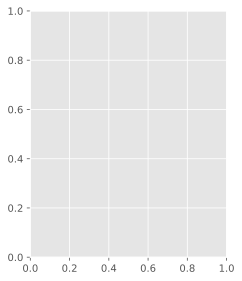

In [37]:
plt.figure(figsize=(12,10))

plt.subplot(231)
sns.heatmap(pd.DataFrame(Tdemographics.isnull().sum()/Tdemographics.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("demographics")

plt.subplot(232)
sns.heatmap(pd.DataFrame(Tprevious.isnull().sum()/Tprevious.shape[0]*100),annot=True,
            cmap=sns.color_palette("cool"),linewidth=1,linecolor="white")
plt.title("previous")

plt.subplots_adjust(wspace = 1.6)

In [38]:
Tdemographics.head(3)

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients,set
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.32,6.53,GT Bank,NaN,NaN,NaN,train
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.33,7.12,Sterling Bank,NaN,Permanent,NaN,train
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.75,5.56,Fidelity Bank,NaN,NaN,NaN,train


In [39]:
Tdemographics.drop_duplicates(subset=Tdemographics.columns,keep='last', inplace=True)

In [40]:
Tdemographics['Age']=2018-Tdemographics.birthdate.dt.year

In [41]:
Tdemographics.Age=pd.cut(Tdemographics.Age,[0,13,31,51,100],labels=['ChildAge','YoungAge','MiddleAge','SeniorAge'])

In [42]:
Tdemographics["bank_account_type"].value_counts()

Savings    4570
Other      1168
Current      80
Name: bank_account_type, dtype: int64

In [43]:
Tdemographics["bank_account_type"] = Tdemographics["bank_account_type"].replace("Current", "Other")

In [44]:
Tdemographics["bank_account_type"].value_counts()

Savings    4570
Other      1248
Name: bank_account_type, dtype: int64

In [45]:
pd.crosstab(Tdemographics.employment_status_clients,Tdemographics.bank_account_type,margins=True).style.background_gradient(cmap='summer_r')

bank_account_type,Other,Savings,All
employment_status_clients,,,
Contract,1,1,2
Permanent,813,3392,4205
Retired,2,6,8
Self-Employed,322,148,470
Student,73,116,189
Unemployed,25,54,79
All,1236,3717,4953


In [46]:
Tdemographics["level_of_education_clients"].value_counts()

Graduate         576
Secondary        118
Post-Graduate     90
Primary           11
Name: level_of_education_clients, dtype: int64

In [47]:
Tdemographics["bank_name_clients"].value_counts()

GT Bank               2128
First Bank             790
Access Bank            567
UBA                    461
Zenith Bank            412
Diamond Bank           392
EcoBank                202
Stanbic IBTC           193
FCMB                   168
Skye Bank              146
Fidelity Bank          139
Sterling Bank           67
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

In [48]:
Tdemographics["bank_branch_clients"].value_counts()

OBA AKRAN                                                         3
APAPA                                                             3
OGBA                                                              3
HEAD OFFICE                                                       3
AJOSE ADEOGUN                                                     2
OREGUN                                                            2
WHARF ROAD, APAPA                                                 1
OBA AKRAN ROAD, IKEJA,                                            1
ABULE EGBA U-TURN,BRANCH                                          1
KEFFI BRANCH IKOYI                                                1
TINCAN                                                            1
3, OBA AKRAN                                                      1
40,SAPELE ROAD ,OPPOSITE DUMAZ JUNCTION BENIN CITY EDO STATE.     1
PLOT 999C DANMOLE STREET, ADEOLA ODEKU, VICTORIA ISLAND, LAGOS    1
OGUDU, OJOTA                                    

In [49]:
Tdemographics["employment_status_clients"].value_counts()

Permanent        4205
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

In [50]:
Tdemographics["bank_name_clients"].value_counts()

GT Bank               2128
First Bank             790
Access Bank            567
UBA                    461
Zenith Bank            412
Diamond Bank           392
EcoBank                202
Stanbic IBTC           193
FCMB                   168
Skye Bank              146
Fidelity Bank          139
Sterling Bank           67
Wema Bank               37
Union Bank              36
Heritage Bank           27
Keystone Bank           25
Standard Chartered      19
Unity Bank               9
Name: bank_name_clients, dtype: int64

In [51]:
Liquidity_Ratio = pd.read_csv("../data/external/Nigerian_Banks_Liquidity_Ratio_Efficiency_Ratio_and_Profitability.csv", sep=";")

FileNotFoundError: File b'../data/external/Nigerian_Banks_Liquidity_Ratio_Efficiency_Ratio_and_Profitability.csv' does not exist